<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Normality%20Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from my_library import *

In [4]:
from scipy.stats import norm,gennorm,normaltest as normal_test
from itertools import product

results=pd.DataFrame()
results.index=pd.MultiIndex.from_tuples(list(product(list(range(10,1001,1)),list(np.arange(half,four,0.1)))))
results.index.names=["Portfolio","Beta"]
sample_size,rho=int(annualize),0.80 # year of daily returns in US markets, correlation between asset returns

for n,beta in tqdm(results.index):
    sample=pd.Series(np.array([gennorm(beta,zero,one).rvs(int(n/(one+(n-one)*rho))).mean() for _ in range(sample_size)])) # sample_size observations of mean of n rvs with given beta
    results.loc[(n,beta),"Mean"]=sample.mean()
    results.loc[(n,beta),"St.Dev."]=sample.var()
    results.loc[(n,beta),"Skewness"]=sample.skew()
    results.loc[(n,beta),"Kurtosis"]=sample.kurt()+three
    results.loc[(n,beta),"Normal Test"]=normal_test(sample)[1]

for alpha in 0.05,0.01,0.001:
    results["NT %g" % (alpha*hundred)]=results["Normal Test"]<alpha

display(results)

  0%|          | 0/34685 [00:00<?, ?it/s]

Mean     St.Dev.  Skewness   Kurtosis   Normal Test  NT 5  \
Portfolio Beta                                                                  
10        0.5  -0.571182  103.155576 -0.476200   9.642240  5.000677e-12  True   
          0.6   0.187708   25.211714 -0.422652  11.005127  7.095161e-13  True   
          0.7  -0.461226   10.620901 -0.246627   6.623784  4.631319e-07  True   
          0.8  -0.105188    6.862597 -0.117990   6.135267  6.609166e-06  True   
          0.9  -0.093729    2.928212 -0.020439   8.368055  1.008598e-08  True   
...                  ...         ...       ...        ...           ...   ...   
1000      3.5  -0.058892    0.323231  0.054562   2.321602  4.385343e-03  True   
          3.6  -0.026025    0.384985 -0.136789   2.375074  1.053208e-02  True   
          3.7  -0.051018    0.368851 -0.089056   2.386128  1.658351e-02  True   
          3.8   0.037386    0.353210  0.054820   2.174724  2.631921e-05  True   
          3.9   0.031984    0.341977  0.048497   2.216669  1.604082e-04  True   

                 NT 1  NT 0.1  
Portfolio Beta                 
10        0.5    True    True  
          0.6    True    True  
          0.7    True    True  
          0.8    True    True  
          0.9    True    True  
...               ...     ...  
1000      3.5    True   False  
          3.6   False   False  
          3.7   False   False  
          3.8    True    True  
          3.9    True    True  

[34685 rows x 8 columns]

17:26:34 Displaying F.P.R. with Gaussian Filter sigma=0.
17:26:36 Saved plot to persistent storage at: /content/drive/MyDrive/Normality of Portfolio Returns for 252 Days with 80% Correlation.png.


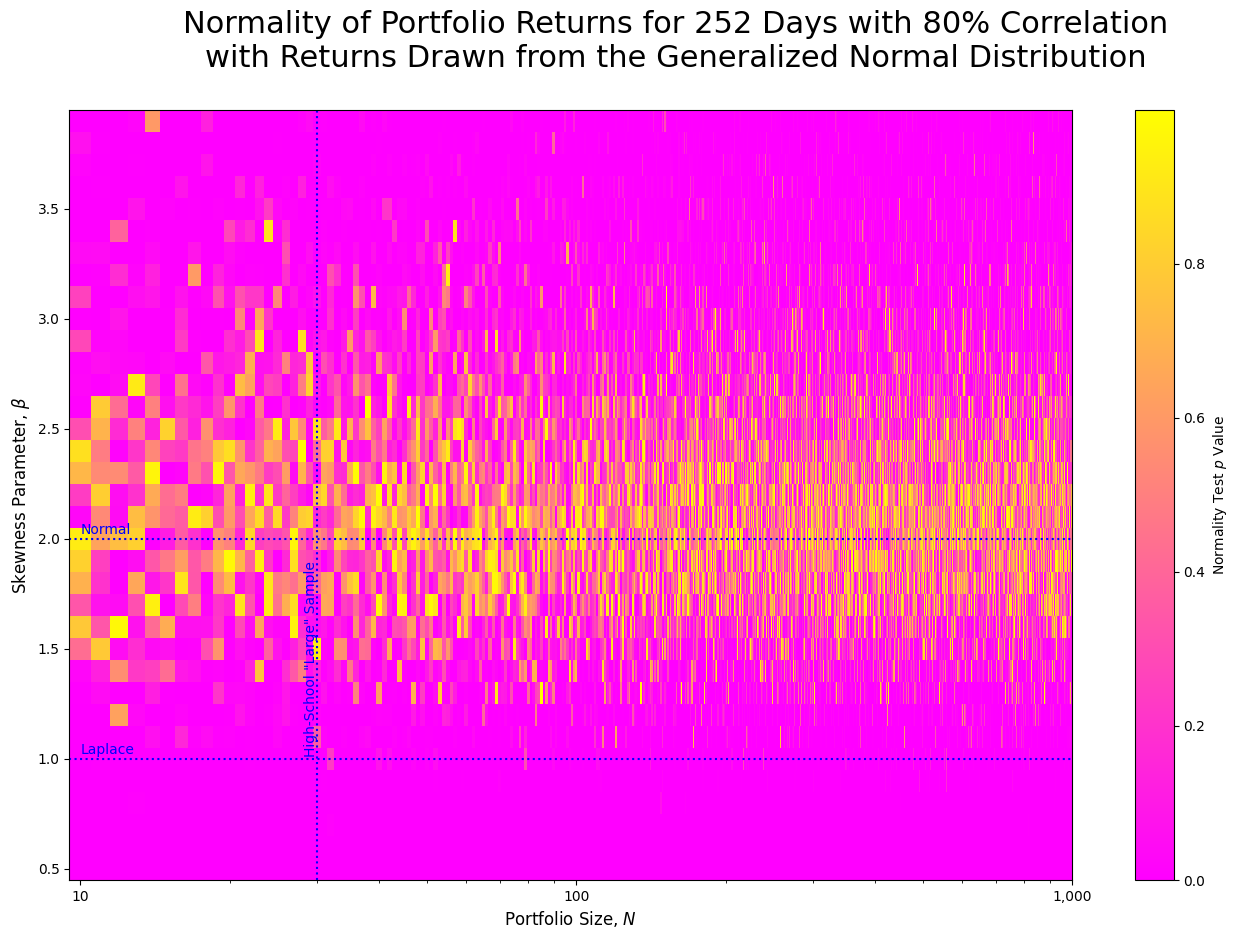

In [5]:
from scipy.ndimage import gaussian_filter
nprint("Displaying F.P.R. with Gaussian Filter sigma=%g." % (sigma:=zero))

Z=(df:=results.reset_index()).pivot_table(index="Beta",columns="Portfolio",values="Normal Test").values
X,Y=np.meshgrid(np.sort(df["Portfolio"].unique()),np.sort(df["Beta"].unique()))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
mesh=plot.pcolormesh(X,Y,gaussian_filter(Z,sigma) if sigma else Z,cmap='spring')
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))
plot.set_xlabel("Portfolio Size, $N$",fontsize=12)
plot.set_ylabel("Skewness Parameter, $\\beta$",fontsize=12)
figure.suptitle(title:="Normality of Portfolio Returns for %d Days with %.0f%% Correlation\nwith Returns Drawn from the Generalized Normal Distribution" % (sample_size,rho*hundred),fontsize=22)

for y,t in (two,"Normal"),(one,"Laplace"):
    plot.axhline(y,color=(c:='blue'),linestyle=':')
    plot.text(X.min(),y+0.01,t,color=c,ha='left',va='bottom')

for x,t in ((30,'High-School "Large" Sample'),):
    plot.axvline(x,color=c,linestyle=':')
    plot.text(x*0.94,y+0.01,t,color=c,ha='left',va='bottom',rotation=90)

figure.colorbar(mesh,ax=plot,label='Normality Test $p$ Value')
figure.savefig(filename:="/content/drive/MyDrive/"+title.split("\n")[0]+".png",dpi=300,bbox_inches='tight')
nprint("Saved plot to persistent storage at: %s." % filename)

17:52:46 Getting list of image files to merge...
17:52:46 Appended 'Normality of Portfolio Returns for 252 Days with 0% Correlation.png' to frames.
17:52:46 Appended 'Normality of Portfolio Returns for 252 Days with 10% Correlation.png' to frames.
17:52:46 Appended 'Normality of Portfolio Returns for 252 Days with 20% Correlation.png' to frames.
17:52:46 Appended 'Normality of Portfolio Returns for 252 Days with 30% Correlation.png' to frames.
17:52:46 Appended 'Normality of Portfolio Returns for 252 Days with 40% Correlation.png' to frames.
17:52:46 Appended 'Normality of Portfolio Returns for 252 Days with 50% Correlation.png' to frames.
17:52:46 Appended 'Normality of Portfolio Returns for 252 Days with 60% Correlation.png' to frames.
17:52:46 Appended 'Normality of Portfolio Returns for 252 Days with 70% Correlation.png' to frames.
17:52:46 Appended 'Normality of Portfolio Returns for 252 Days with 80% Correlation.png' to frames.
17:52:46 Writing images to Animation.gif as animated

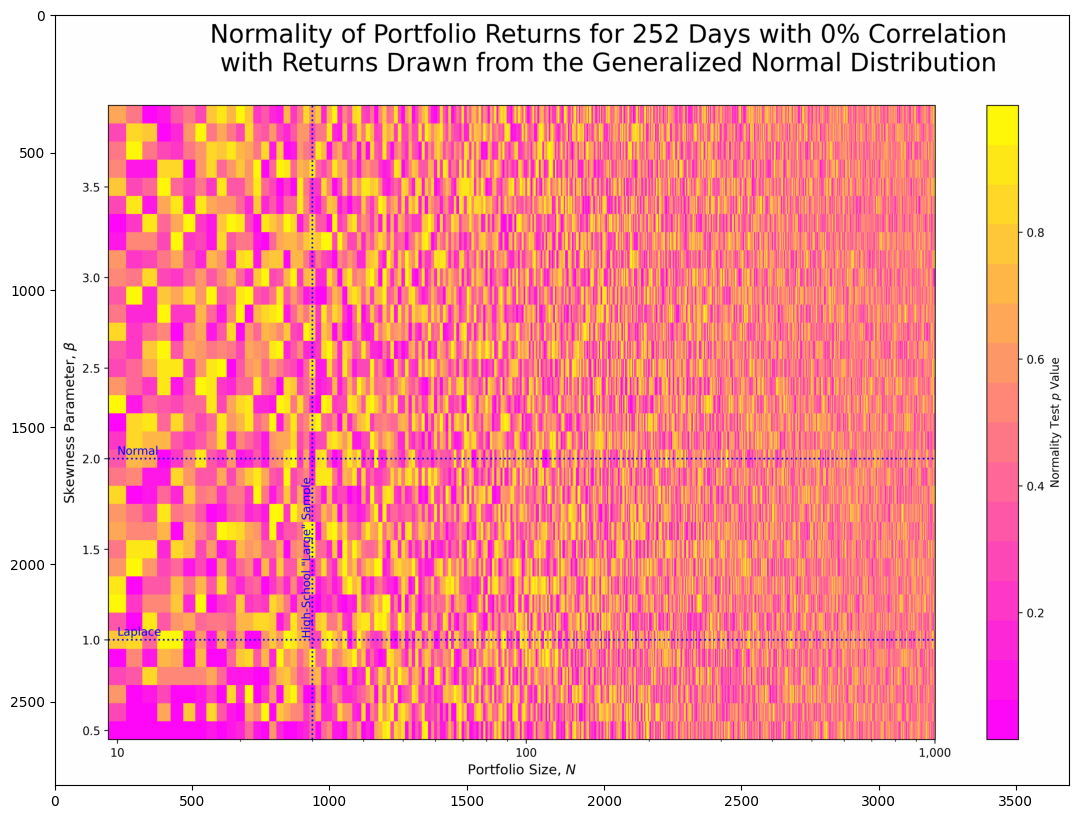

In [9]:
from PIL import Image
from os import listdir
frames,path=[],"/content/drive/MyDrive"

nprint("Getting list of image files to merge...")

for file in sorted([f for f in listdir(path) if "Normality of Portfolio Returns" in f]):
    frames.append(Image.open("%s/%s" % (path,file)))
    nprint("Appended '%s' to frames." % file)

nprint("Writing images to %s as animated gif." % (filename:="Animation.gif"))
frames[0].save(filename,append_images=frames[1:],save_all=True,duration=750,loop=0,minimize_size=True)

# thumnail it in the output (won't animate currently)
animation = pl.imread(filename)
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.imshow(animation)
nprint("Done.")